# 📊 Clustering
> **Grouping the same kind of unleveled data**  
> Data points are **classified / groupified** in manner so that:  
> - **Intra-group similarities are high**  
> - **Inter-group similarities are low**  

---

# 🔹 Hierearchial Clustering (*tree like clustering*)
- **Numerical datapoints (1D, 2D, ...)** are given  
- Make a **distance matrix**
- Find the **nearest data points**
- **Cluster them together**
- In the distance matrix **replace the datapoints with their cluster and recompute the distances wrt to the new cluster**
  - `Single Linkage Method` : 
    - *Merge the column and row which is clustered, to the min col and row.*
    - *Copy the distances with no change.*

  - `Double Linkage Method` :
    - *Merge the column and row which is clustered, to the min col and row.*
    - *Recompute the distance using formula: **max((C1x - C2x), (C1y - C2y))** or **max((C1x - x), (C1y - x))***


# Types
- **Agglomerative clustering**
  - `Starting with individual points --> Merge the closest clusters --> Create a dendrogram`
- **Divisive clustering**
  - `Start with all data points in one cluster --> Split the farthest cluster --> Stop when each data point is in its own cluster`

### Dataset creation for clustering

In [85]:
from sklearn.datasets import make_blobs

In [86]:
x, y = make_blobs(n_samples=50,centers=5, cluster_std=2, random_state=42)
data = x
data

array([[  4.61288439,  -0.14225217],
       [  1.98350674,   2.36689216],
       [ -5.88253967,   6.28698248],
       [-14.07781796,   8.96732792],
       [  0.42209991,   8.56273353],
       [ -2.37414121,   6.16478976],
       [ -4.81118478,   9.76568216],
       [  6.28496866,  -0.46851762],
       [ -7.83797567,  -7.25142755],
       [  2.61454079,   4.6835621 ],
       [  4.40858227,   1.37096229],
       [ -7.02364743,  -4.8730438 ],
       [ -8.11505571,   6.03328341],
       [ -3.59796307,   9.23613131],
       [ -8.66423362,   6.72550821],
       [  5.05760603,  -1.94617056],
       [ -8.55806224,  -7.49853434],
       [ -6.23145925,  -7.65027415],
       [ -8.6548062 ,   3.34838509],
       [  3.71860129,   4.08741414],
       [ -4.53485986,   9.64278079],
       [ -5.25457555,  -4.16762954],
       [  0.61819405,   3.50612726],
       [ -4.81762815,  -5.01754936],
       [  3.43860146,   1.38978218],
       [ -7.00752352,   7.98102513],
       [ -5.95903329,   7.88971107],
 

In [87]:
import matplotlib.pyplot as plt

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_360\1751997479.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


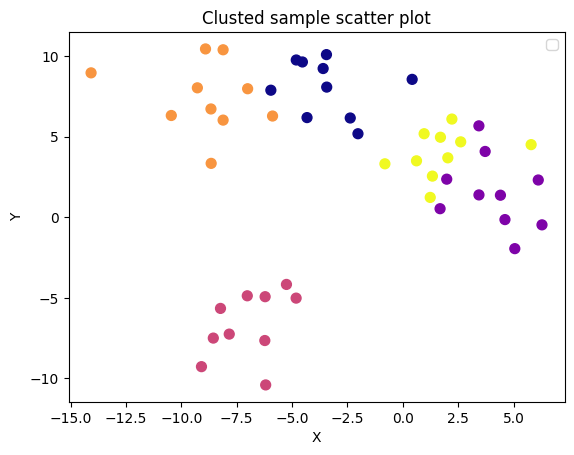

In [88]:
# Visualise the clustered sample
plt.scatter(data[:, 0], data[:, 1], c=y, cmap="plasma", s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Clusted sample scatter plot")
plt.legend()

## Agglomerative Clustering Implementation

In [89]:
from sklearn.cluster import AgglomerativeClustering

- Type 1
    - Number of cluster is provided **randomly**

In [90]:
agg1 = AgglomerativeClustering(n_clusters=2)
result = agg1.fit(data)

In [91]:
labels = result.fit_predict(data)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [92]:
result.n_leaves_

50

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_360\1673264367.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


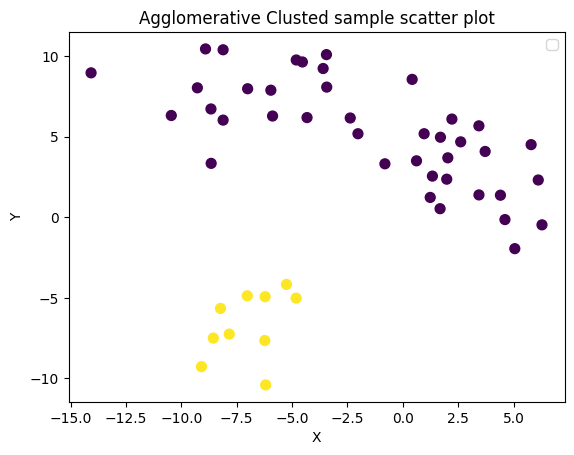

In [93]:
# Visualise the clustered sample
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Agglomerative Clusted sample scatter plot")
plt.legend()

- Type 2
    - Number of cluster is provided **by observing dendrogram**

In [94]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [95]:
# linkage / distance matrix creation of the data
linkage = linkage(data, method="ward")
linkage

array([[ 6.        , 20.        ,  0.30242388,  2.        ],
       [ 1.        , 30.        ,  0.67397282,  2.        ],
       [ 8.        , 16.        ,  0.76130575,  2.        ],
       [32.        , 49.        ,  0.76863961,  2.        ],
       [35.        , 36.        ,  0.79622352,  2.        ],
       [11.        , 29.        ,  0.80848716,  2.        ],
       [33.        , 37.        ,  0.83013301,  2.        ],
       [13.        , 34.        ,  0.87617841,  2.        ],
       [12.        , 14.        ,  0.88361279,  2.        ],
       [21.        , 23.        ,  0.95566036,  2.        ],
       [10.        , 24.        ,  0.97016337,  2.        ],
       [ 5.        , 44.        ,  1.03747928,  2.        ],
       [25.        , 26.        ,  1.05245904,  2.        ],
       [ 9.        , 41.        ,  1.14951531,  2.        ],
       [40.        , 47.        ,  1.29061192,  2.        ],
       [22.        , 27.        ,  1.43870489,  2.        ],
       [ 2.        , 28.

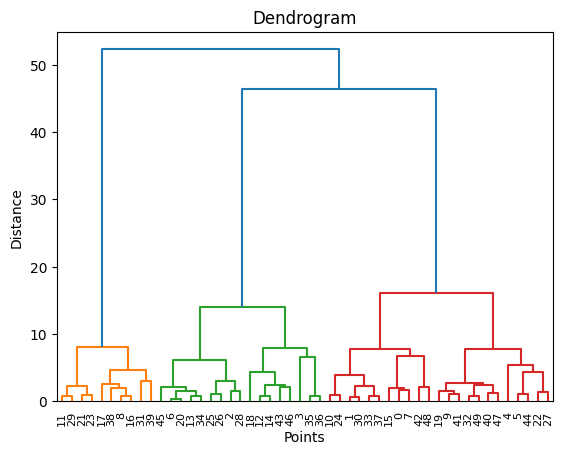

In [96]:
dendrogram(linkage,orientation="top")
plt.title("Dendrogram")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

`The largest vertical jump has to be determined`
- Above the largest vertical gap -> ***Imperfect Clustering***
- Below it -> ***Perfect Clustering***

> Hence, number of clustered dendrgram present below the largest vertical gap => perfect n_clusters

In [97]:
# Hence 3 is the best fit
agg2 = AgglomerativeClustering(n_clusters=3)
result = agg2.fit_predict(data)
labels = result

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_360\1673264367.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


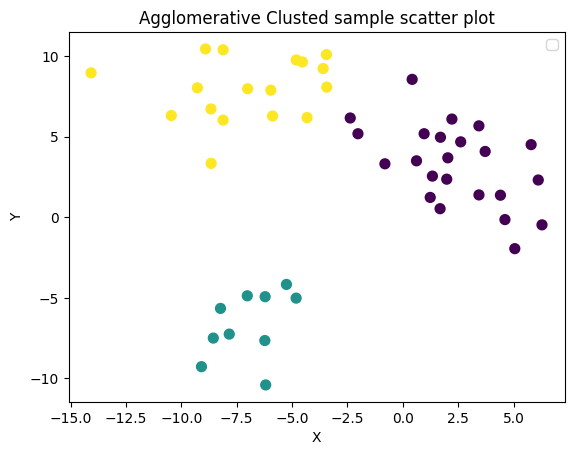

In [98]:
# Visualise the clustered sample
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Agglomerative Clusted sample scatter plot")
plt.legend()

In [ ]:
# Another way
from scipy.cluster.hierarchy import fcluster

labels_ = fcluster(linkage, t=20, criterion="distance")
labels_

array([3, 3, 2, 2, 3, 3, 2, 3, 1, 3, 3, 1, 2, 2, 2, 3, 1, 1, 2, 3, 2, 1,
       3, 1, 3, 2, 2, 3, 2, 1, 3, 1, 3, 3, 2, 2, 2, 3, 1, 1, 3, 3, 3, 2,
       3, 2, 2, 3, 3, 3], dtype=int32)

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_360\1673264367.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


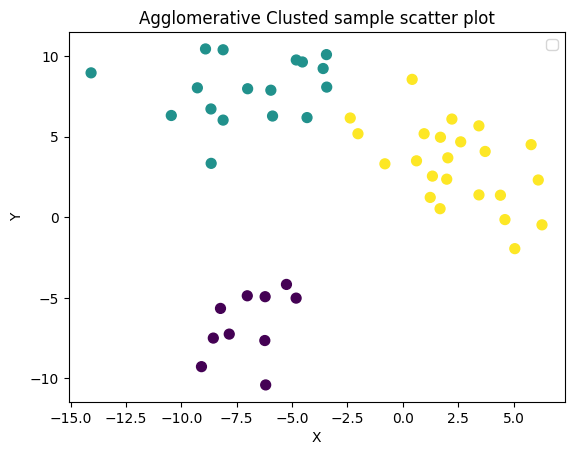

In [ ]:
# Visualise the clustered sample
plt.scatter(data[:, 0], data[:, 1], c=labels_, cmap="viridis", s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Agglomerative Clusted sample scatter plot")
plt.legend()

## ****Observe Difference with KMeans****

In [107]:
from sklearn.cluster import KMeans

In [111]:
k_means_labels = KMeans(n_clusters=3, init="k-means++", random_state=42).fit_predict(data)
k_means_labels

array([1, 1, 0, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1], dtype=int32)

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_360\795140250.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_360\795140250.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


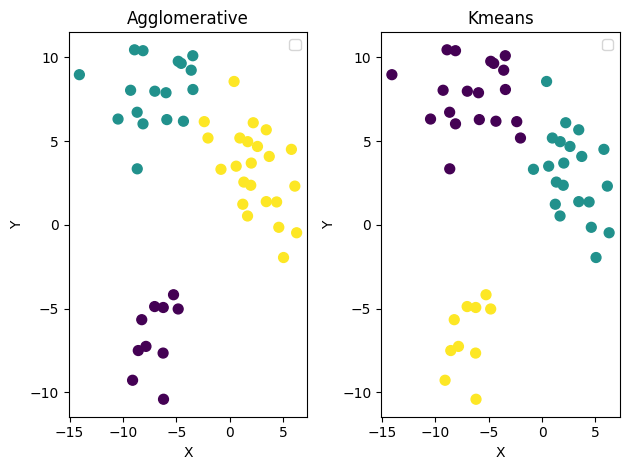

In [117]:
# Visualise the clustered sample by agg
plt.subplot(1,2,1)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Agglomerative")
plt.legend()

# Visualise the clustered sample by kmeans
plt.subplot(1,2,2)
plt.scatter(data[:, 0], data[:, 1], c=k_means_labels, cmap="viridis", s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Kmeans")
plt.tight_layout()
plt.legend()